In [141]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
import time
import rtree
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
newInv = pd.read_csv('/Users/chaseji/Downloads/DA/Nashoba/crime_newInv.csv')
newSur1 = pd.read_csv('/Users/chaseji/Downloads/DA/Nashoba/crime_NewSur1.csv')

In [153]:
# allRecord
newInv['category'] = 'inv'
newSur1['category'] = 'sur'
allRecords = pd.concat([newInv, newSur1])
allRecords.to_csv('/Users/chaseji/Downloads/DA/Nashoba/allRecords_category.csv')

In [186]:
newInv['type'] = newInv['type'].str.replace('Drug', 'Narcotics')
newSur1['type'] = newSur1['type'].str.replace('Drug', 'Narcotics')

In [187]:
newSur1['type'].value_counts()

Theft        16978
Assault       8117
Other         7268
Arrest        3508
Vandalism     3500
Burglary      2953
Robbery       1724
Narcotics      311
Shooting       286
Arson           68
Name: type, dtype: int64

In [140]:
newInv_area = 0.274
newSur1_area = 42.435
print(len(newInv))
print(len(newSur1))
print(len(newSur1)+len(newInv))

183
44713
44896


In [1]:
print(183/0.274)
print(44713/42.435)

667.883211678832
1053.6821020384116


In [12]:
# Date the Records
newInv.index = pd.to_datetime(newInv['date'])
newSur1.index = pd.to_datetime(newSur1['date'])

In [114]:
# debug. Example: crimetype = Theft
crimeType = "Arson"
sur1Records = newSur1[newSur1['type']==crimeType]

invRecords = newInv[newInv['type']==crimeType]
inv16 = invRecords[invRecords.date.str[:4]=="2016"]
inv17 = invRecords[invRecords.date.str[:4]=="2017"]
print(len(inv16))

0


'\nprint(inv_numbers)\nif (len(sur1_numbers) > 2):\n    sur1_numbers = sur1_numbers[:-1]\ninv_perSquare = (inv_numbers/newInv_area).fillna(0)\nsur1_perSquare = (sur1_numbers/newSur1_area).fillna(0)\n\ntypeList.append(crimeType)\ninv16.append(inv_perSquare[0])\ninv17.append(inv_perSquare[1])\nsur16.append(sur1_perSquare[0])\nsur17.append(sur1_perSquare[1])\ninvSum.append(inv_perSquare.sum())\nsurSum.append(sur1_perSquare.sum())\ndf_type = pd.DataFrame({\'inv_numbers\': inv_numbers, \'sur1_numbers\': sur1_numbers, \n                          \'inv_perSquare\': inv_perSquare, \'sur1_perSquare\': sur1_perSquare})\ndf_type = df_type.fillna(0)\ndf_type.to_csv("/Users/chaseji/Downloads/crime_"+crimeType+".csv")\ndf_type.inv_perSquare.plot(marker = \'o\')\ndf_type.sur1_perSquare.plot(marker = \'o\')\nplt.legend(["Investment site","Surrounding area"])\nplt.xlabel("Date")\nplt.ylabel("Amount per Square Miles")\nplt.title("Crime "+crimeType+" 2016 - 2017")\nplt.savefig("/Users/chaseji/Downloads/p

In [192]:
# ~~~~~~~~~~~~Categorize by Type~~~~~~~~~~~~~
typeList = []
inv16 = []
inv17 = []
sur16 = []
sur17 = []
invSum = []
surSum = []


for crimeType, sur1Records in newSur1.groupby('type'):
    invRecords = newInv[newInv['type']==crimeType]
    inv16_records = invRecords[invRecords.date.str[:4]=="2016"]
    inv17_records = invRecords[invRecords.date.str[:4]=="2017"]
    sur16_records = sur1Records[sur1Records.date.str[:4]=="2016"]
    sur17_records = sur1Records[sur1Records.date.str[:4]=="2017"]

    typeList.append(crimeType)
    inv16.append(len(inv16_records)/newInv_area)
    inv17.append(len(inv17_records)/newInv_area)
    sur16.append(len(sur16_records)/newSur1_area)
    sur17.append(len(sur17_records)/newSur1_area)
    invSum.append(len(invRecords)/newInv_area)
    surSum.append(len(sur1Records)/newSur1_area)

df_count = pd.DataFrame({'type': typeList, 'inv16': inv16, 'inv17': inv17, 
                       'sur16': sur16, 'sur17': sur17, 
                       'invSum': invSum, 'surSum': surSum})
cols = df_count.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_count = df_count[cols]
print(df_count)

df_count.to_csv("/Users/chaseji/Downloads/crimeCount.csv")

        type      inv16       inv17      invSum       sur16       sur17  \
0     Arrest  21.897810   10.948905   32.846715   29.009073   53.658537   
1      Arson   0.000000    0.000000    0.000000    0.895487    0.706964   
2    Assault  40.145985   54.744526   94.890511   60.539649  130.741133   
3   Burglary  25.547445   36.496350   62.043796   28.254978   41.333805   
4  Narcotics   0.000000    7.299270    7.299270    1.413927    5.914929   
5      Other  18.248175   62.043796   80.291971   57.240485  114.033227   
6    Robbery   0.000000   10.948905   10.948905   15.906681   24.720160   
7   Shooting   0.000000    3.649635    3.649635    3.039943    3.699776   
8      Theft  80.291971  186.131387  266.423358  151.172381  248.898315   
9  Vandalism  10.948905   98.540146  109.489051   26.157653   56.321433   

       surSum  
0   82.667609  
1    1.602451  
2  191.280782  
3   69.588783  
4    7.328856  
5  171.273713  
6   40.626841  
7    6.739720  
8  400.094262  
9   82.479086 

In [223]:
df_count = pd.read_csv("/Users/chaseji/Downloads/crimeCount.csv")
df_count['diffInv'] = df_count['inv17'] - df_count['inv16'] 
df_count['pctInv'] = (df_count['inv17'] - df_count['inv16'] )/df_count['inv16']
df_count['diffSur'] = df_count['sur17'] - df_count['sur16'] 
df_count['pctSur'] = (df_count['sur17'] - df_count['sur16'] )/df_count['sur16']
df_count['diffOnDiff'] = df_count['diffInv'] - df_count['diffSur'] 
df_count

,Unnamed: 0,type,inv16,inv17,invSum,sur16,sur17,surSum,diffInv,pctInv,diffSur,pctSur,diffOnDiff
0,0,Arrest,21.897810,10.948905,32.846715,29.009073,53.658537,82.667609,-10.948905,-0.500000,24.649464,0.849716,-35.598369
1,1,Arson,0.000000,0.000000,0.000000,0.895487,0.706964,1.602451,0.000000,NaN,-0.188524,-0.210526,0.188524
2,2,Assault,40.145985,54.744526,94.890511,60.539649,130.741133,191.280782,14.598540,0.363636,70.201485,1.159595,-55.602944
3,3,Burglary,25.547445,36.496350,62.043796,28.254978,41.333805,69.588783,10.948905,0.428571,13.078826,0.462886,-2.129921
4,4,Narcotics,0.000000,7.299270,7.299270,1.413927,5.914929,7.328856,7.299270,inf,4.501002,3.183333,2.798269
5,5,Other,18.248175,62.043796,80.291971,57.240485,114.033227,171.273713,43.795620,2.400000,56.792742,0.992178,-12.997121
6,6,Robbery,0.000000,10.948905,10.948905,15.906681,24.720160,40.626841,10.948905,inf,8.813479,0.554074,2.135426
7,7,Shooting,0.000000,3.649635,3.649635,3.039943,3.699776,6.739720,3.649635,inf,0.659833,0.217054,2.989802
8,8,Theft,80.291971,186.131387,266.423358,151.172381,248.898315,400.094262,105.839416,1.318182,97.725934,0.646454,8.113482
9,9,Vandalism,10.948905,98.540146,109.489051,26.157653,56.321433,82.479086,87.591241,8.000000,30.163780,1.153153,57.427461


In [224]:
df_count.to_csv("/Users/chaseji/Downloads/Nashoba_crimeCount.csv")

In [166]:
print(df_count['diffInv'].sum())
print(df_count['diffSur'].sum())

273.7226277372263
306.39802050194413


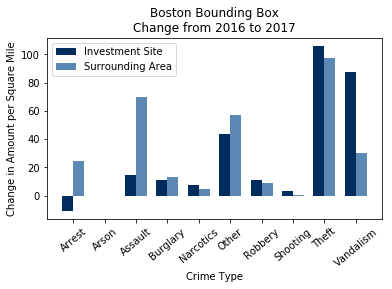

In [222]:
# Side by side bar graph - Difference
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(len(df_count['diffInv']))
width = 0.35

ax.bar(ind, df_count['diffInv'], width, color = '#002D5D')
ax.bar(ind+width, df_count['diffSur'], width, color = '#5B89B4')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_count['type'], rotation=40)
plt.xlabel("Crime Type")
plt.ylabel("Change in Amount per Square Mile")
plt.legend(["Investment Site","Surrounding Area"])
plt.subplots_adjust(bottom = 0.25)
plt.title("Boston Bounding Box\nChange from 2016 to 2017")
plt.savefig("/Users/chaseji/Downloads/plot_allCrime_change.png", dpi = 300)

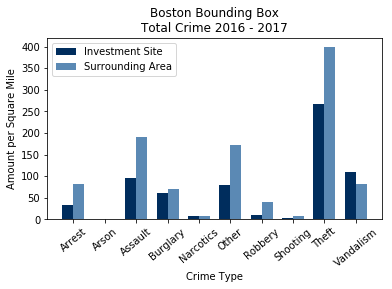

In [221]:
# Side by side bar graph - Total
import numpy as np
plt.figure(1)
fig = plt.figure(1)
ax = fig.add_subplot(111)
ind = np.arange(len(invSum))
width = 0.35

ax.bar(ind, invSum, width, color = '#002D5D')
ax.bar(ind+width, surSum, width, color = '#5B89B4')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_count['type'], rotation=40)
plt.xlabel("Crime Type")
plt.ylabel("Amount per Square Mile")
plt.subplots_adjust(bottom = 0.25)
plt.legend(["Investment Site","Surrounding Area"])
plt.title("Boston Bounding Box\nTotal Crime 2016 - 2017")
plt.savefig("/Users/chaseji/Downloads/plot_allCrime_amount.png", dpi = 300)

In [129]:
# Subset of Records by Type - Output
for crimeType, records in allRecords.groupby('type'):
    records.to_csv("/Users/chaseji/Downloads/allRecords_"+crimeType+".csv")

Theft        73
Vandalism    30
Assault      26
Other        22
Burglary     17
Arrest        9
Robbery       3
Narcotics     2
Shooting      1
Name: type, dtype: int64


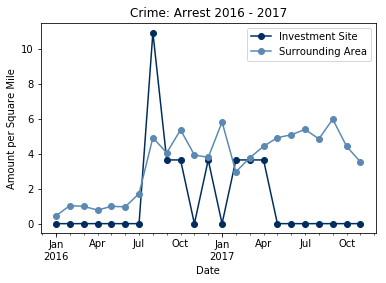

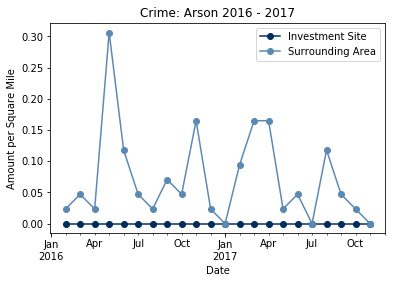

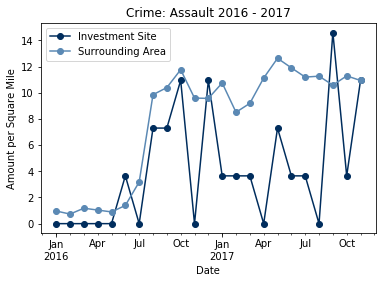

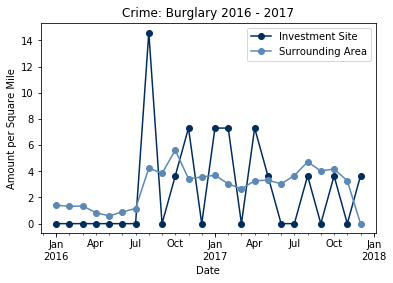

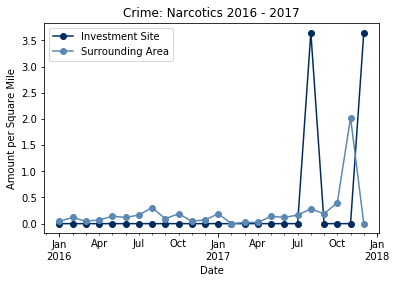

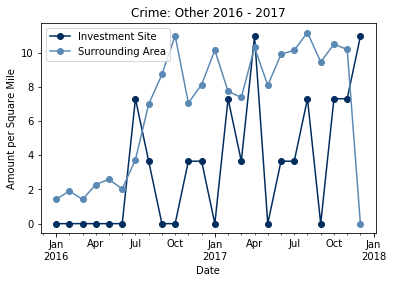

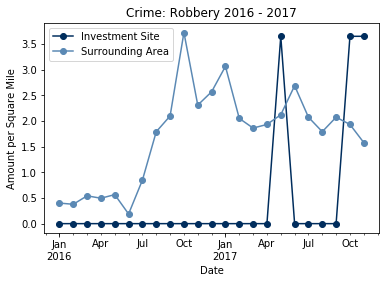

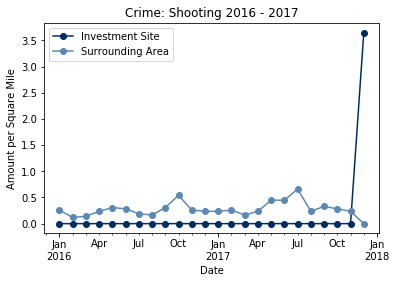

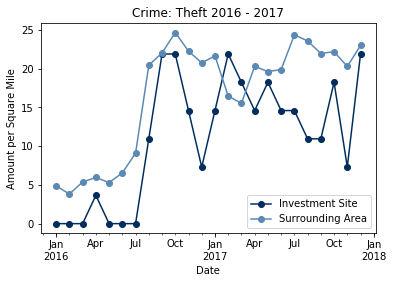

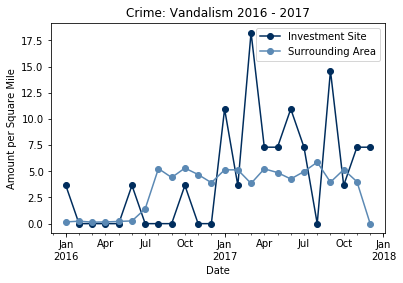

In [205]:
# ~~~~~~~~~~~~Categorize by Type~~~~~~~~~~~~~
print(newInv['type'].value_counts())
i = 0
for crimeType, sur1Records in newSur1.groupby('type'):
    invRecords = newInv[newInv['type']==crimeType]
    inv_numbers = invRecords['date'].resample("M").count()
    sur1_numbers = sur1Records['date'].resample("M").count()
    sur1_numbers = sur1_numbers[:-1]
    inv_perSquare = inv_numbers/newInv_area
    sur1_perSquare = sur1_numbers/newSur1_area
    df_type = pd.DataFrame({'inv_numbers': inv_numbers, 'sur1_numbers': sur1_numbers, 
                              'inv_perSquare': inv_perSquare, 'sur1_perSquare': sur1_perSquare})
    df_type = df_type.fillna(0)
    # df_type.to_csv("/Users/chaseji/Downloads/crime_" + crimeType + ".csv")
    plt.figure(i)
    i = i + 1
    df_type.inv_perSquare.plot(marker = 'o', color = '#002D5D')
    df_type.sur1_perSquare.plot(marker = 'o', color = '#5B89B4')
    plt.legend(["Investment Site","Surrounding Area"])
    plt.xlabel("Date")
    plt.ylabel("Amount per Square Mile")
    plt.gcf().subplots_adjust(bottom = 0.15)
    plt.title("Crime: " + crimeType + " 2016 - 2017")
    plt.savefig("/Users/chaseji/Downloads/plot_" + crimeType + ".png", dpi = 300)

In [13]:
# Resample by Month
inv_numbers = newInv['date'].resample("M").count()
sur1_numbers = newSur1['date'].resample("M").count()
sur1_numbers = sur1_numbers[:-1]

date
2016-01-31     1
2016-02-29     0
2016-03-31     0
2016-04-30     1
2016-05-31     0
2016-06-30     2
2016-07-31     2
2016-08-31    13
2016-09-30     9
2016-10-31    12
2016-11-30     7
2016-12-31     7
2017-01-31    10
2017-02-28    13
2017-03-31    13
2017-04-30    12
2017-05-31    11
2017-06-30     9
2017-07-31     8
2017-08-31     7
2017-09-30    11
2017-10-31    11
2017-11-30    10
2017-12-31    14
Freq: M, Name: date, dtype: int64

In [15]:
type(sur1_numbers)

pandas.core.series.Series

In [31]:
InvPerSq = (inv_numbers/newInv_area)

In [36]:
type(InvPerSq)

pandas.core.series.Series

Text(0.5,1,'Crime Total 2016 - 2017')

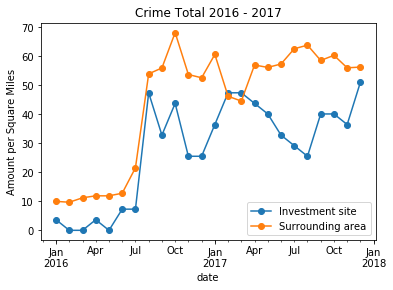

In [45]:
(inv_numbers/newInv_area).plot(marker = 'o')
(sur1_numbers/newSur1_area).plot(marker = 'o')
plt.legend(["Investment site","Surrounding area"])
plt.ylabel("Amount per Square Miles")
plt. title("Crime Total 2016 - 2017")